# Veteran Suicide Prevention - Preprocessing & Exploration Scratchpad

In [1]:
# Imports

import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.impute
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

import suicide_acquire
import suicide_explore

# ignore warnings to make for a cleaner notebook
import warnings
warnings.filterwarnings('ignore')



In [2]:
pd.__version__

'0.25.3'

In [3]:
age_adjusted_df = suicide_acquire.age_adjusted()

age_adjusted_df.head()


Age-Adjusted Veteran Suicide Rate DF
Consists of 13 rows and 10 columns


,year,total_vet_suicides,est_total_vet_pop,age_adjusted_rate_per_100K,male_suicides,est_male_vet_pop,male_age_adjusted_rate_per_100K,female_suicides,est_female_vet_pop,female_age_adjusted_rate_per_100K
4,2005,5787,24240000,25.5,5610,22501000,27.3,177,1739000,10.4
5,2006,5688,23731000,24.8,5527,21992000,26.8,161,1739000,9.2
6,2007,5893,23291000,26.5,5724,21588000,28.7,169,1703000,9.7
7,2008,6216,22996000,28.4,6024,21322000,30.8,192,1674000,11.3
8,2009,6172,22603000,28.3,5968,20917000,30.4,204,1686000,12.2


In [4]:
train, test = sklearn.model_selection.train_test_split(age_adjusted_df, train_size=.80, random_state=123)
train, validate = sklearn.model_selection.train_test_split(train, train_size=.80, random_state=123)

**^^Check to see if the data's been split**

In [5]:
print("Trained Age_Adjusted DataFrame")
print(f"Consists of {len(train)} rows and {len(train.columns)} columns")

train.head()

Trained Age_Adjusted DataFrame
Consists of 8 rows and 10 columns


,year,total_vet_suicides,est_total_vet_pop,age_adjusted_rate_per_100K,male_suicides,est_male_vet_pop,male_age_adjusted_rate_per_100K,female_suicides,est_female_vet_pop,female_age_adjusted_rate_per_100K
10,2011,6116,22061000,29.8,5889,20326000,32.3,227,1735000,12.9
7,2008,6216,22996000,28.4,6024,21322000,30.8,192,1674000,11.3
16,2017,6139,19803000,35.8,5843,17951000,39.1,296,1852000,16.8
12,2013,6132,21415000,31.7,5901,19640000,34.7,231,1775000,13.0
9,2010,6158,22411000,28.9,5943,20697000,31.3,215,1714000,12.3


In [6]:
print("Validated Age_Adjusted DataFrame")
print(f"Consists of {len(validate)} rows and {len(validate.columns)} columns")

validate.head()

Validated Age_Adjusted DataFrame
Consists of 2 rows and 10 columns


,year,total_vet_suicides,est_total_vet_pop,age_adjusted_rate_per_100K,male_suicides,est_male_vet_pop,male_age_adjusted_rate_per_100K,female_suicides,est_female_vet_pop,female_age_adjusted_rate_per_100K
15,2016,6010,20170000,34.3,5756,18348000,37.9,254,1822000,13.8
4,2005,5787,24240000,25.5,5610,22501000,27.3,177,1739000,10.4


**We've trained on 8 rows and validated on 2 - there are a total of 13 rows in the age_adjusted_df, so:**

In [7]:
print(f"{round(8/13 * 100, 2)}% of the data is used for training,")
print(f"{round(2/13 * 100, 2)}% of the data is used for validating,")
print(f"Leaving {round(3/13 * 100, 2)}% for testing, or real world application.")

61.54% of the data is used for training,
15.38% of the data is used for validating,
Leaving 23.08% for testing, or real world application.


**Separating roughly 23% of the data for testing falls well within the recommended 20-25% range.**

In [8]:
age_adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 4 to 16
Data columns (total 10 columns):
year                                 13 non-null int64
total_vet_suicides                   13 non-null int64
est_total_vet_pop                    13 non-null int64
age_adjusted_rate_per_100K           13 non-null float64
male_suicides                        13 non-null int64
est_male_vet_pop                     13 non-null int64
male_age_adjusted_rate_per_100K      13 non-null float64
female_suicides                      13 non-null int64
est_female_vet_pop                   13 non-null int64
female_age_adjusted_rate_per_100K    13 non-null float64
dtypes: float64(3), int64(7)
memory usage: 1.1 KB


In [9]:
age_adjusted_df.index

Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

**Because we're dealing with discrete variables (definite numbers - no one counted could be considered 'partly' or 'in the process of' suicide; they either committed it or they didn't), we can take a look at the heatmap.**`

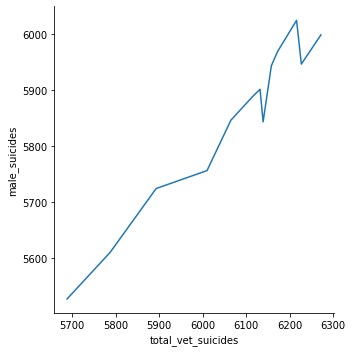

In [10]:
nums = sns.relplot(x="total_vet_suicides", y="male_suicides", kind="line", data=age_adjusted_df);

nums

In [11]:
# adding column that gives percentage of total suicides that are male

age_adjusted_df["suicide_%_thats_male"] = round((age_adjusted_df.male_suicides / age_adjusted_df.total_vet_suicides)*100, 2)

In [12]:
age_adjusted_df.head()

,year,total_vet_suicides,est_total_vet_pop,age_adjusted_rate_per_100K,male_suicides,est_male_vet_pop,male_age_adjusted_rate_per_100K,female_suicides,est_female_vet_pop,female_age_adjusted_rate_per_100K,suicide_%_thats_male
4,2005,5787,24240000,25.5,5610,22501000,27.3,177,1739000,10.4,96.94
5,2006,5688,23731000,24.8,5527,21992000,26.8,161,1739000,9.2,97.17
6,2007,5893,23291000,26.5,5724,21588000,28.7,169,1703000,9.7,97.13
7,2008,6216,22996000,28.4,6024,21322000,30.8,192,1674000,11.3,96.91
8,2009,6172,22603000,28.3,5968,20917000,30.4,204,1686000,12.2,96.69


In [13]:
age_adjusted_df = age_adjusted_df.set_index("year")

In [14]:
age_adjusted_df.index

Int64Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017],
           dtype='int64', name='year')

**What is the relationship between male suicides and overall suicide numbers?**

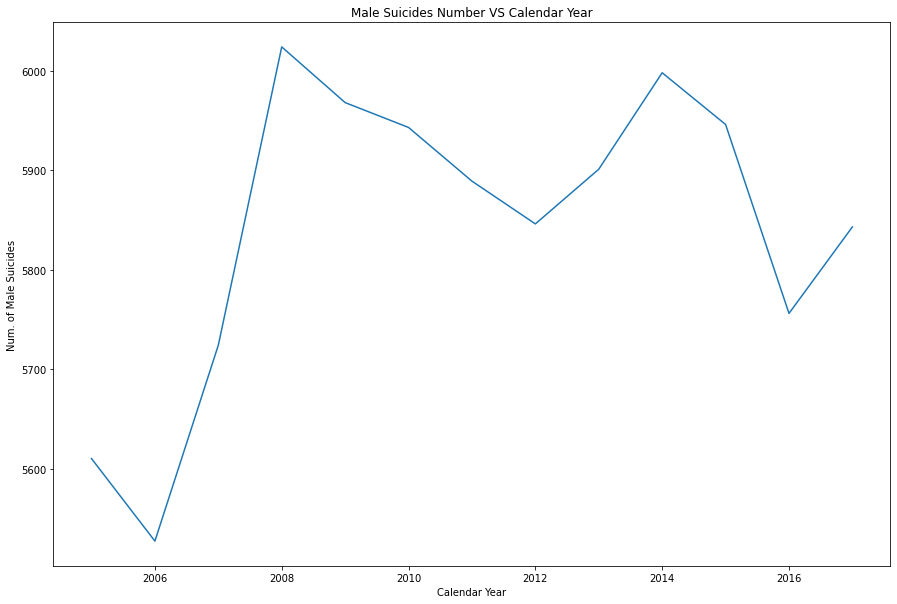

In [15]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x=age_adjusted_df.index, y= "male_suicides", data=age_adjusted_df)
plt.title("Male Suicides Number VS Calendar Year")
ax.set_xlabel("Calendar Year")
ax.set_ylabel("Num. of Male Suicides")
plt.show()

**^^Seems that as time moves forward the number of male veteran suicides increases, with the overall numbers fluctuating between .25 and 2.50%.** 

- So, what do the numbers look like over time?

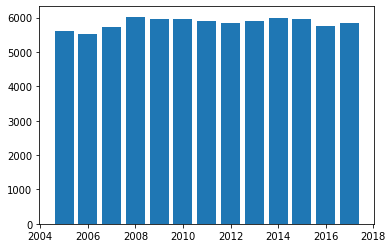

In [16]:
time = plt.bar(age_adjusted_df.index, age_adjusted_df["male_suicides"])

**What about the *percentage* of suicides over time that are male?**

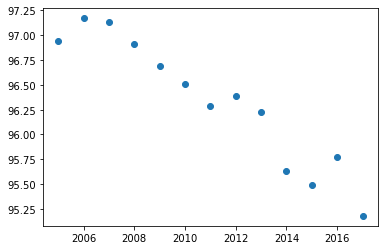

In [17]:
plt.scatter(age_adjusted_df.index, age_adjusted_df["suicide_%_thats_male"])

**Next, checking to see what female age-adjusted rate looks like:**

In [18]:
pd.crosstab(age_adjusted_df.female_age_adjusted_rate_per_100K, age_adjusted_df.index,
            margins=True).style.background_gradient(cmap="PuBuGn")

col_0,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
female_age_adjusted_rate_per_100K,,,,,,,,,,,,,,
9.2,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9.7,0,0,1,0,0,0,0,0,0,0,0,0,0,1
10.4,1,0,0,0,0,0,0,0,0,0,0,0,0,1
11.3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12.2,0,0,0,0,1,0,0,0,0,0,0,0,0,1
12.3,0,0,0,0,0,1,0,1,0,0,0,0,0,2
12.9,0,0,0,0,0,0,1,0,0,0,0,0,0,1
13.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
13.8,0,0,0,0,0,0,0,0,0,0,0,1,0,1


**^^Similarly, female age-adjusted rates increase over time, however, it seems there is more periodic reducition of rates with women.**

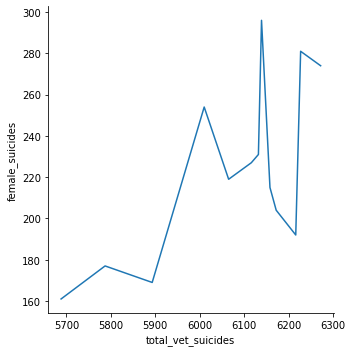

In [19]:
sns.relplot(x="total_vet_suicides", y="female_suicides", kind="line", data=age_adjusted_df);

### Walkthrough of Age-Adjusted Suicide Rates

### The age distribution of a population greatly affects its mortality rate.  In calculating the age-adjusted rate for this project, age groups (18-35, 36-55, etc.) were created and the total number of veterans in those age groups were counted.

Within each age group, the number of suicides were counted, and to get the age-adjusted suicide rate, that number was divided by the total population of that group.  

**For example:**

>You have 100 veterans between the ages of 20 and 25.  Of those 100 veterans, 3 committed suicide.
    
>The age-adjusted suicide rate for that group of 20-25 year-old veterans = 3 / 100 or 3%
    
Again, the purpose of the age-adjusted rate is to narrow down which specific age groups are most prone to committing suicide.  While crude rate helps us understand suicide's devastating effects across the entire veteran population, crude-rate data has been excluded from our datasets in favor of the more specific age-adjusted rate.

In [20]:
age_group_df = suicide_acquire.age_group_df()

age_group_df.head()

age_group_df = suicide_explore.data_split(age_group_df)




This is the AgeGroup DataFrame
Consists of 52 rows and 10 columns
Trained     year  total_suicides  est_total_vet_pop  veteran_crude_rate_per_100K  \
4   2005             544            2147000                         25.3   
5   2005            2059            7116000                         28.9   
6   2005            1866            9976000                         18.7   
7   2005            1315            5001000                         26.3   
9   2006             482            2113000                         22.8   
10  2006            1995            6940000                         28.7   
11  2006            1925            9721000                         19.8   
12  2006            1284            4957000                         25.9   
14  2007             525            2099000                         25.0   
15  2007            2033            6694000                         30.4   
16  2007            1978            9539000                         20.7   
17  2007     

In [21]:
age_group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 4 to 67
Data columns (total 10 columns):
year                                52 non-null int64
total_suicides                      52 non-null int64
est_total_vet_pop                   52 non-null int64
veteran_crude_rate_per_100K         52 non-null float64
male_suicides                       52 non-null int64
est_male_vet_pop                    52 non-null int64
male_veteran_crude_rate_per_100K    52 non-null float64
female_suicides                     52 non-null int64
est_female_vet_pop                  52 non-null int64
age_group_num                       52 non-null int64
dtypes: float64(2), int64(8)
memory usage: 4.5 KB


In [22]:
train_2, test_2 = sklearn.model_selection.train_test_split(age_group_df, train_size=.80, random_state=123)
train_2, validate_2 = sklearn.model_selection.train_test_split(train_2, train_size=.80, random_state=123)

In [23]:
print(f"Trained df has {len(train_2)} rows and {len(train.columns)} columns" )
print(f"Validated df has {len(validate_2)} rows and {len(validate.columns)} columns")

Trained df has 32 rows and 10 columns
Validated df has 9 rows and 10 columns


In [24]:
print(f"{round(32/52 * 100, 2)}% of the data is used for training,")
print(f"{round(9/52 * 100, 2)}% of the data is used for validating,")
print(f"Leaving {round(11/52 * 100, 2)}% for testing, or real world application.")

61.54% of the data is used for training,
17.31% of the data is used for validating,
Leaving 21.15% for testing, or real world application.


**21.15% falls well within the 75-80% data split**

In [25]:
age_group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 4 to 67
Data columns (total 10 columns):
year                                52 non-null int64
total_suicides                      52 non-null int64
est_total_vet_pop                   52 non-null int64
veteran_crude_rate_per_100K         52 non-null float64
male_suicides                       52 non-null int64
est_male_vet_pop                    52 non-null int64
male_veteran_crude_rate_per_100K    52 non-null float64
female_suicides                     52 non-null int64
est_female_vet_pop                  52 non-null int64
age_group_num                       52 non-null int64
dtypes: float64(2), int64(8)
memory usage: 4.5 KB


In [26]:
recent_vha_user_df = suicide_acquire.recent_vha_user()

recent_vha_user_df.head()


DataFrame of Suicides Among Recent VHA Users
Consists of 13 rows and 10 columns


,year,vha_suicides,vha_pop_est,vha_age_adjusted_per_100K,male_suicides,male_vha_pop_est,male_vha_age_adjusted_per_100K,female_suicides,female_vha_pop_est,female_vha_age_adjusted_per_100K
4,2005,1638,5230872,29.6,1582,4860127,32.2,56,370742,13.8
5,2006,1733,5323518,30.0,1700,4935484,33.8,33,388032,7.9
6,2007,1703,5379603,29.7,1659,4974026,32.9,44,405577,10.4
7,2008,1870,5454501,32.8,1819,5030169,36.8,51,424332,11.2
8,2009,1822,5627383,30.6,1768,5181672,33.4,54,445711,12.4


In [27]:
recent_vha_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 4 to 16
Data columns (total 10 columns):
year                                13 non-null int64
vha_suicides                        13 non-null int64
vha_pop_est                         13 non-null int64
vha_age_adjusted_per_100K           13 non-null float64
male_suicides                       13 non-null int64
male_vha_pop_est                    13 non-null int64
male_vha_age_adjusted_per_100K      13 non-null float64
female_suicides                     13 non-null int64
female_vha_pop_est                  13 non-null int64
female_vha_age_adjusted_per_100K    13 non-null float64
dtypes: float64(3), int64(7)
memory usage: 1.1 KB


In [28]:
train_3, test_3 = sklearn.model_selection.train_test_split(recent_vha_user_df, train_size=.80, random_state=123)
train_3, validate_3 = sklearn.model_selection.train_test_split(train_3, train_size=.80, random_state=123)

In [29]:
print(f"Trained df has {len(train_3)} rows and {len(train.columns)} columns" )
print(f"Validated df has {len(validate_3)} rows and {len(validate.columns)} columns")

Trained df has 8 rows and 10 columns
Validated df has 2 rows and 10 columns


In [30]:
print(f"{round(8/13 * 100, 2)}% of the data is used for training,")
print(f"{round(2/13 * 100, 2)}% of the data is used for validating,")
print(f"Leaving {round(3/13 * 100, 2)}% for testing, or real world application.")

61.54% of the data is used for training,
15.38% of the data is used for validating,
Leaving 23.08% for testing, or real world application.


**23.08% falls well within the 75-80% data split**

In [31]:
vha_by_age_group_df = suicide_acquire.vha_by_age_group()

vha_by_age_group_df.head()


DataFrame of Suicides Among Recent VHA Visits by Age Group
Consists of 52 rows and 5 columns


,year,vha_suicides,vha_pop_est,vha_veteran_crude_per_100K,vha_age_group_num
4,2005,68,324938,20.9,1
5,2005,446,1243916,35.9,2
6,2005,701,2396917,29.2,3
7,2005,423,1263344,33.5,4
9,2006,73,350939,20.8,1


In [32]:
vha_by_age_group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 4 to 67
Data columns (total 5 columns):
year                          52 non-null int64
vha_suicides                  52 non-null int64
vha_pop_est                   52 non-null int64
vha_veteran_crude_per_100K    52 non-null float64
vha_age_group_num             52 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.4 KB


In [33]:
train_4, test_4 = sklearn.model_selection.train_test_split(vha_by_age_group_df, train_size=.80, random_state=123)
train_4, validate_4 = sklearn.model_selection.train_test_split(train_4, train_size=.80, random_state=123)

In [34]:
print(f"Trained df has {len(train_4)} rows and {len(train.columns)} columns" )
print(f"Validated df has {len(validate_4)} rows and {len(validate.columns)} columns")

Trained df has 32 rows and 10 columns
Validated df has 9 rows and 10 columns


In [35]:
print(f"{round(32/52 * 100, 2)}% of the data is used for training,")
print(f"{round(9/52 * 100, 2)}% of the data is used for validating,")
print(f"Leaving {round(11/52 * 100, 2)}% for testing, or real world application.")

61.54% of the data is used for training,
17.31% of the data is used for validating,
Leaving 21.15% for testing, or real world application.


**21.15% falls well within the 75-80% data split**

In [36]:
non_vha_user_df = suicide_acquire.non_vha_user()

non_vha_user_df.head()


DataFrame of Suicides Among Non-Recent VHA Users
Consists of 13 rows and 10 columns


,year,non_vha_veteran_suicides,est_non_vha_pop,non_vha_age_adjusted_per_100K,male_non_vha_veteran_suicides,male_non_vha_veteran_pop_est,male_non_vha_age_adjusted_per_100K,female_non_vha_suicides,female_non_vha_veteran_pop_est,female_non_vha_age_adjusted_per_100K
4,2005,4149,18939349,24.3,4028,17573850,26.1,121,1365502,9.6
5,2006,3955,18337358,23.4,3827,16989164,25.0,128,1348196,9.7
6,2007,4190,17841206,25.5,4065,16546625,27.6,125,1294581,9.6
7,2008,4346,17471384,27.1,4205,16224710,29.2,141,1246674,11.4
8,2009,4350,16905365,27.6,4200,15668146,29.5,150,1237219,12.2


In [37]:
non_vha_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 4 to 16
Data columns (total 10 columns):
year                                    13 non-null int64
non_vha_veteran_suicides                13 non-null int64
est_non_vha_pop                         13 non-null int64
non_vha_age_adjusted_per_100K           13 non-null float64
male_non_vha_veteran_suicides           13 non-null int64
male_non_vha_veteran_pop_est            13 non-null int64
male_non_vha_age_adjusted_per_100K      13 non-null float64
female_non_vha_suicides                 13 non-null int64
female_non_vha_veteran_pop_est          13 non-null int64
female_non_vha_age_adjusted_per_100K    13 non-null float64
dtypes: float64(3), int64(7)
memory usage: 1.1 KB


In [38]:
train_5, test_5 = sklearn.model_selection.train_test_split(non_vha_user_df, train_size=.80, random_state=123)
train_5, validate_5 = sklearn.model_selection.train_test_split(train_5, train_size=.80, random_state=123)

In [39]:
print(f"Trained df has {len(train_5)} rows and {len(train.columns)} columns" )
print(f"Validated df has {len(validate_5)} rows and {len(validate.columns)} columns")

Trained df has 8 rows and 10 columns
Validated df has 2 rows and 10 columns


In [40]:
print(f"{round(8/13 * 100, 2)}% of the data is used for training,")
print(f"{round(2/13 * 100, 2)}% of the data is used for validating,")
print(f"Leaving {round(3/13 * 100, 2)}% for testing, or real world application.")

61.54% of the data is used for training,
15.38% of the data is used for validating,
Leaving 23.08% for testing, or real world application.


**23.08% falls well within the 75-80% data split**

In [41]:
non_vha_by_age_df = suicide_acquire.non_vha_by_age()

non_vha_by_age_df.head()


DataFrame of Suicides Among Those Who Had NOT Recently Visited the VHA
Consists of 52 rows and 5 columns


,year,non_vha_veteran_suicides,non_vha_veteran_pop_est,non_vha_veteran_crude_per_100K,age_group_num
4,2005,476,1818019,26.2,1
5,2005,1613,5856380,27.5,2
6,2005,1165,7544801,15.4,3
7,2005,892,3721923,24.0,4
9,2006,409,1757799,23.3,1


In [42]:
non_vha_by_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 4 to 67
Data columns (total 5 columns):
year                              52 non-null int64
non_vha_veteran_suicides          52 non-null int64
non_vha_veteran_pop_est           52 non-null int64
non_vha_veteran_crude_per_100K    52 non-null float64
age_group_num                     52 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.4 KB


In [43]:
train_6, test_6 = sklearn.model_selection.train_test_split(non_vha_by_age_df, train_size=.80, random_state=123)
train_6, validate_6 = sklearn.model_selection.train_test_split(train_6, train_size=.80, random_state=123)

In [44]:
print(f"Trained df has {len(train_6)} rows and {len(train.columns)} columns" )
print(f"Validated df has {len(validate_6)} rows and {len(validate.columns)} columns")

Trained df has 32 rows and 10 columns
Validated df has 9 rows and 10 columns


In [45]:
print(f"{round(32/52 * 100, 2)}% of the data is used for training,")
print(f"{round(9/52 * 100, 2)}% of the data is used for validating,")
print(f"Leaving {round(11/52 * 100, 2)}% for testing, or real world application.")

61.54% of the data is used for training,
17.31% of the data is used for validating,
Leaving 21.15% for testing, or real world application.


**21.15% falls well within the 75-80% data split**

### Preprocessing functions that follow:

- Based on the similar division of the datasets into train, validate, and test portions, the 'behind the scenes' work of the preprocessing the datasets for exploration takes place in the accompanying '